In this small tutorial we show how to create and access a multiresolution wavelet filter bank for Morlet filters in 2D, using the functions in filter_bank.py
We will start by creating a filter bank, showing the filters ordered by angle and scale. Then, we show how to convert this filterbank into a multiresolution filter bank. Finally, we show how to generate the multiresolution filter bank in one call to a function. 	

params consistent? J2= 5  L2= 8  N2= 128
Show low pass filter in the Fourier domain


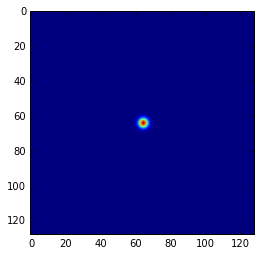

.. and the band pass filters:
j= 0


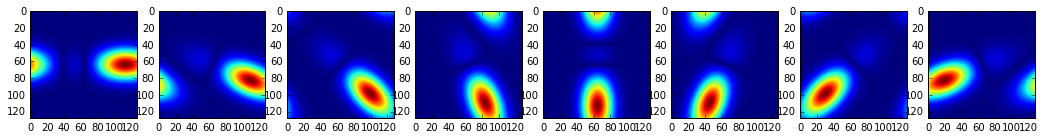

j= 1


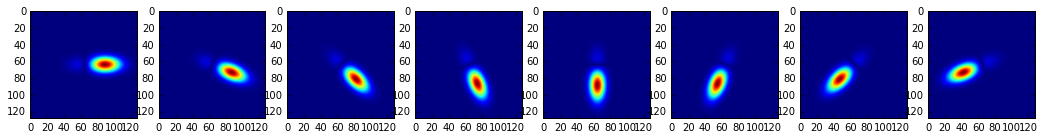

j= 2


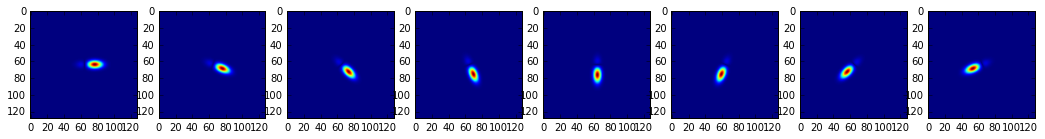

j= 3


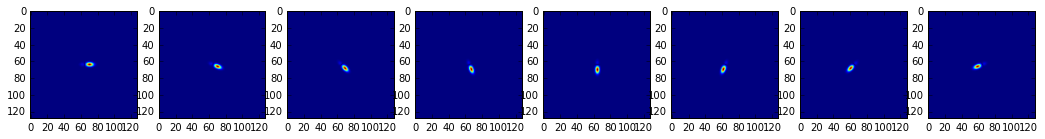

j= 4


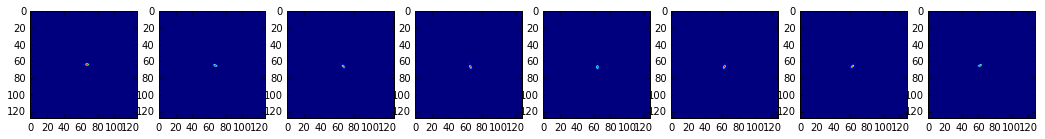

In [9]:
from scattering.filter_bank import filter_bank_morlet2d,multiresolution_filter_bank_morlet2d
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

J = 5 #number of scales
L = 8 #number of angles
px = 128 #size of the filters
sigma_phi=0.6957 #std_0 of the low pass filter
sigma_xi=0.8506  #std_0 of the band pass filters

filters, littlewood = filter_bank_morlet2d(px, J=J, L=L, sigma_phi=sigma_phi, sigma_xi= sigma_xi)

#We can access the values of J,L and px, directly from the ouput
J2 = len(filters['psi']) #scales
L2 = len(filters['psi'][0]) #angles
N2 = filters['psi'][0].shape[-1] #size at max scale

print('params consistent? J2=',J2,' L2=',L2,' N2=', N2)
print('Show low pass filter in the Fourier domain')
plt.imshow(np.abs(np.fft.fftshift(filters['phi'])))
plt.show()
print('.. and the band pass filters in the Fourier domain:')

for j in np.arange(0,J):
    print('j=',j)
    plt.figure(figsize=(18,6))
    for l in np.arange(0,L):
        plt.subplot(1, L, l+1)
        plt.imshow(np.abs(np.fft.fftshift(filters['psi'][j][l, :, :])))
    
    plt.show()    
    